In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
air = pd.read_csv("AirPassengers.csv")
air.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
air.columns = ['Month', 'Number_of_Passengers']
air.head()

,Month,Number_of_Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
air['Smooth.5'] = pd.ewma(air, alpha = .5).Number_of_Passengers
air.head()

AttributeError: module 'pandas' has no attribute 'ewma'

In [7]:
air['Smooth.5'] = air['Number_of_Passengers'].ewm(alpha=0.5).mean()
air.head()

,Month,Number_of_Passengers,Smooth.5
0,1949-01,112,112.000000
1,1949-02,118,116.000000
2,1949-03,132,125.142857
3,1949-04,129,127.200000
4,1949-05,121,124.000000


In [8]:
air['Smooth.9'] = air['Number_of_Passengers'].ewm(alpha=0.9).mean()
air.head()

,Month,Number_of_Passengers,Smooth.5,Smooth.9
0,1949-01,112,112.000000,112.000000
1,1949-02,118,116.000000,117.454545
2,1949-03,132,125.142857,130.558559
3,1949-04,129,127.200000,129.155716
4,1949-05,121,124.000000,121.815498


In [9]:
air['Smooth.7'] = air['Number_of_Passengers'].ewm(alpha=0.7).mean()
air.head()

,Month,Number_of_Passengers,Smooth.5,Smooth.9,Smooth.7
0,1949-01,112,112.000000,112.000000,112.000000
1,1949-02,118,116.000000,117.454545,116.615385
2,1949-03,132,125.142857,130.558559,127.683453
3,1949-04,129,127.200000,129.155716,128.612562
4,1949-05,121,124.000000,121.815498,123.270788


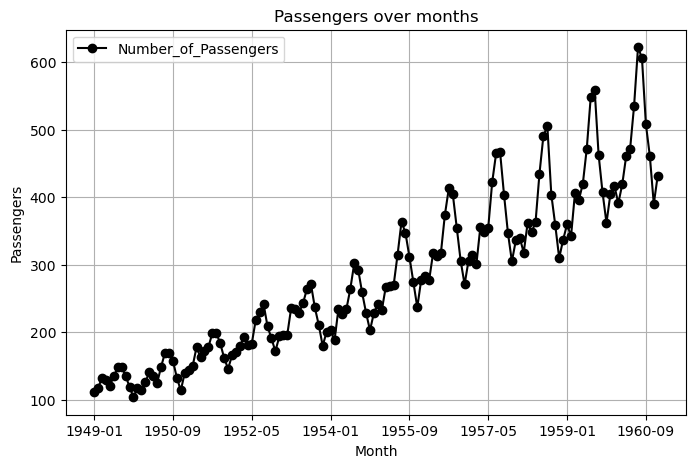

In [10]:
air.plot(x='Month', y='Number_of_Passengers', kind='line', marker='o', linestyle='-', color='black', figsize=(8, 5))
plt.title('Passengers over months')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.grid(True)
plt.show()

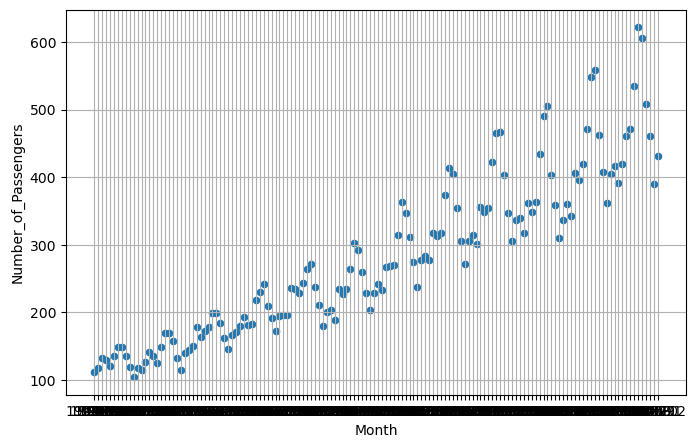

In [11]:
air.plot(x = 'Month', y = 'Number_of_Passengers', kind = 'scatter', figsize = (8,5))
plt.grid(True)
plt.show()

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
air['Month'] = pd.to_datetime(air['Month'])
air.set_index('Month', inplace=True)
air.head()

,Number_of_Passengers,Smooth.5,Smooth.9,Smooth.7
Month,,,,
1949-01-01,112,112.000000,112.000000,112.000000
1949-02-01,118,116.000000,117.454545,116.615385
1949-03-01,132,125.142857,130.558559,127.683453
1949-04-01,129,127.200000,129.155716,128.612562
1949-05-01,121,124.000000,121.815498,123.270788


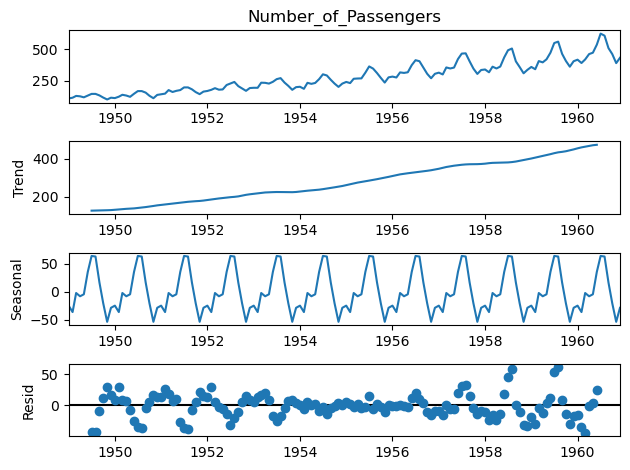

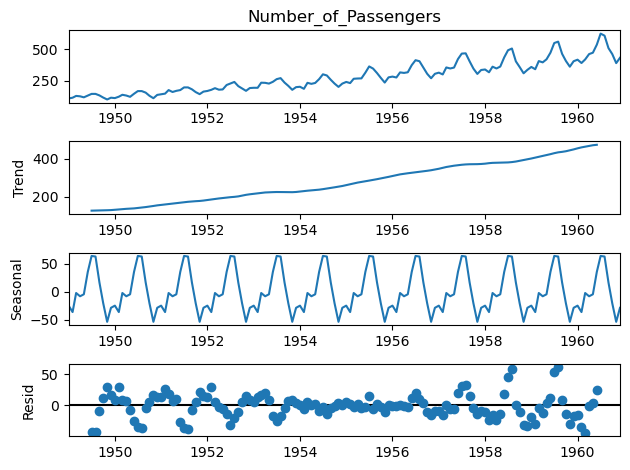

In [15]:
result = seasonal_decompose(air['Number_of_Passengers'], model = 'additive')

seasonal = result.seasonal
trend = result.trend
residual = result.resid
result.plot()

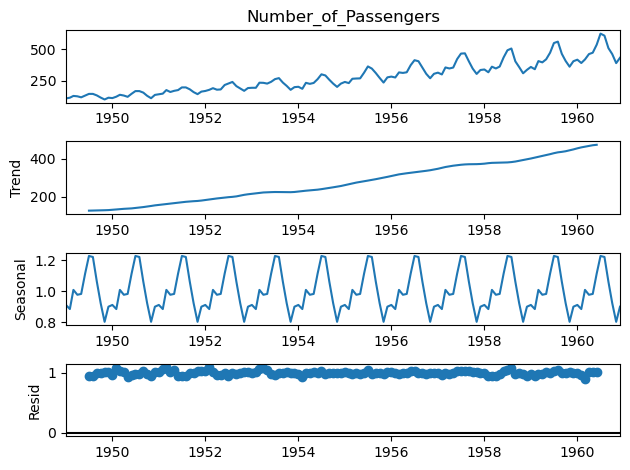

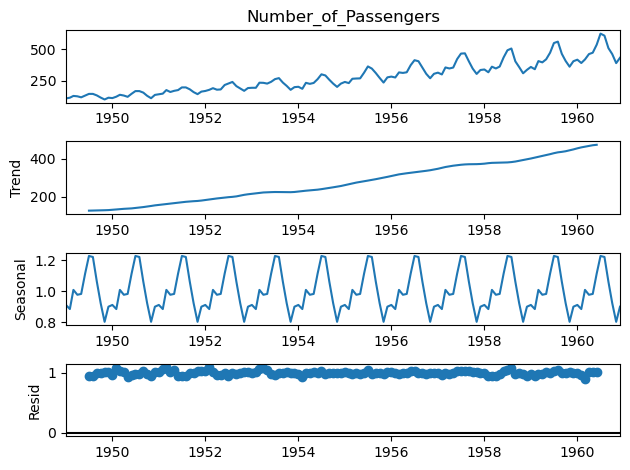

In [16]:
result = seasonal_decompose(air['Number_of_Passengers'], model = 'multiplicative')

seasonal = result.seasonal
trend = result.trend
residual = result.resid
result.plot()

In [20]:
air.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Number_of_Passengers  144 non-null    int64  
 1   Smooth.5              144 non-null    float64
 2   Smooth.9              144 non-null    float64
 3   Smooth.7              144 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 5.6 KB


In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

C:\Users\Vee\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


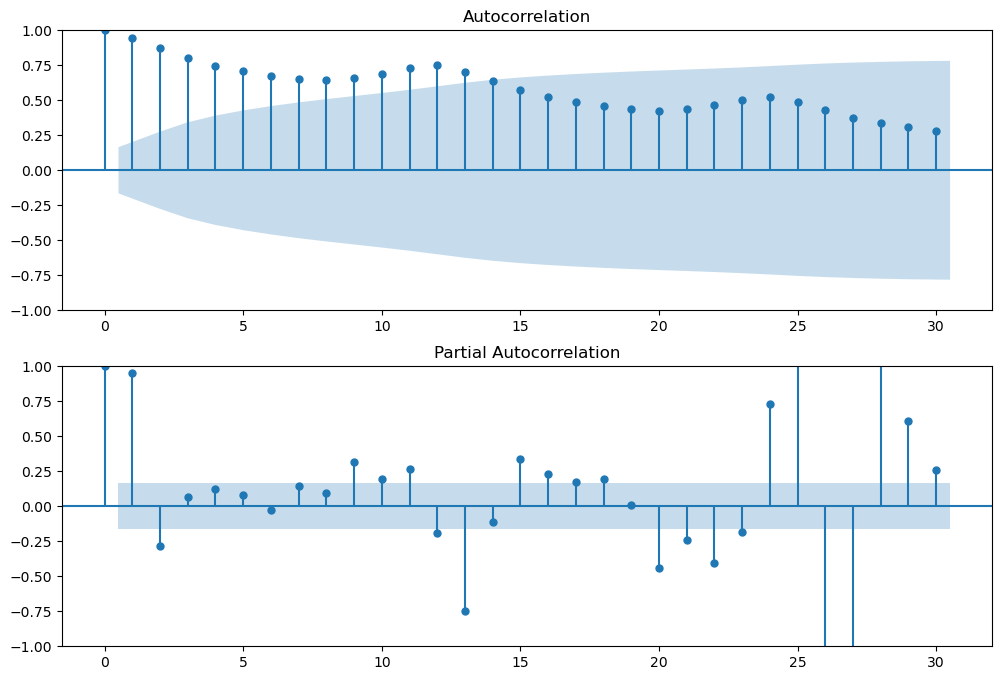

In [22]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(air['Number_of_Passengers'].iloc[3:], lags= 30, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(air['Number_of_Passengers'].iloc[3:], lags= 30, ax = ax2)

In [23]:
air.head()

,Number_of_Passengers,Smooth.5,Smooth.9,Smooth.7
Month,,,,
1949-01-01,112,112.000000,112.000000,112.000000
1949-02-01,118,116.000000,117.454545,116.615385
1949-03-01,132,125.142857,130.558559,127.683453
1949-04-01,129,127.200000,129.155716,128.612562
1949-05-01,121,124.000000,121.815498,123.270788


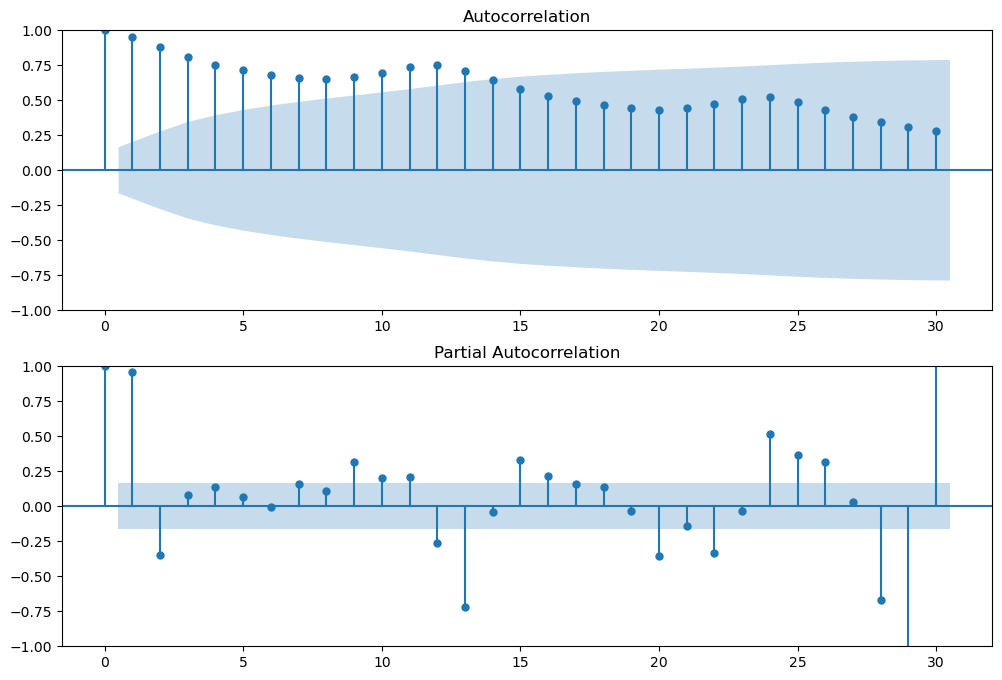

In [25]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(air['Smooth.9'].iloc[3:], lags= 30, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(air['Smooth.9'].iloc[3:], lags= 30, ax = ax2)